<a href="https://colab.research.google.com/github/daalopezm/Optics-of-multilayer-materials/blob/main/Parcial_2_Propiedades_opticas_en_nanomateriales_y_nanoestructuras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>$\theta_c$ for the system BK7/Ag/Air</h1>
<p>Find $\theta_c$ for the system  BK7/Ag/Air with the matrix transfer method. Plot $\theta_c=f(d)$ in the range $0\leq d \leq 200$ nm. </p>

<h2>Solution:</h2>

<p>
The matrix transfer method is given by:
\begin{equation}
    \begin{pmatrix}E_0^{r+}\\E_0^{l+}\end{pmatrix}=T_{0,1}P_1\cdots T_{n-1,n}P_nT_{n,n+1}\begin{pmatrix}E_n^{r-}\\0\end{pmatrix}
\end{equation}
Where $E_0^{r+}$ is the right moving electric field and $E_0^{l+}$ is the left moving. $E_n^{r-}$ is the right moving field after the last layer. The matrices $T_{i,i+1}$ and $P_i$ are given correspondingly by:

\begin{align}
    T_{i,i+1}=\frac{1}{t_{i,i+1}}\begin{pmatrix}1 & r_{i,i+1}\\r_{i,i+1} & 1 \end{pmatrix} & & P_i = 
    \begin{pmatrix}
    e^{-i\phi_i} & 0 \\ 0 & e^{i\phi_i}
    \end{pmatrix}
\end{align}

Where the coefficients of the matrices are:
\begin{align}
    r_{i,i+1}=\frac{n_{i+1}\cos\theta_i-n_i\cos\theta_{i+1}}{n_{i+1}\cos\theta_i+n_i\cos\theta_{i+1}} & & t_{i,i+1}=\frac{2n_i\cos\theta_i}{n_{i+1}\cos\theta_i+ n_i\cos\theta_{i+1}} & & \phi_i=\frac{2\pi n_i}{\lambda_0}L_i\cos\theta_i
\end{align}

In the last layer, there is no left moving field, because we are assuming that such layer is large, therefore no reflection or any physical phenomena will produce such left moving field. After such operation of $T$'s and $P$'s, a matrix $M$ is obtained:
\begin{align}
  \begin{pmatrix}
  E_0^{r+}\\E_0^{l+}
  \end{pmatrix}=\begin{pmatrix}
  M_{11} & M_{12}\\M_{21} & M_{22}
  \end{pmatrix}\begin{pmatrix}E_n^{r-}\\0\end{pmatrix}=\begin{pmatrix}M_{11}E_n^{r-}\\M_{21}E_n^{r-}\end{pmatrix}
\end{align}
Therefore:
\begin{equation}
r_\parallel=\frac{E_0^{l+}}{E_0^{r+} } = \frac{M_{21}}{M_{11}}
\end{equation}
Which can be thought as an effective Fresnel equation for multiple layers. Reflectance is just:
\begin{equation}
R=|r_\parallel|^2= \frac{|M_{21}|^2}{|M_{11}|^2}
\end{equation}
Its maximum will tell us the critical angle for "total" reflection. Additionally, the transmitance can be calculated as: 
\begin{equation}
T = 1-R
\end{equation}

Let's proceed with the code:
</p>



<p>Here we define the transmission matrix $T$, the propagation matrix $P$ and the matrix $M$</p>

In [ ]:
import numpy as np
from scipy.misc import derivative
import matplotlib.pyplot as plt

lambda_0 = 532/10**9

input_refractive_indexes = np.array([1.5, 0.054007+3.4290j, 1])
n_0 = input_refractive_indexes[0]

def cos(n_i, theta_0):
  return np.sqrt(1-(n_0*np.sin(theta_0)/n_i)**2)

def reflectance(n_i, n_imas1, theta_0):
  return (n_imas1*cos(n_i,theta_0)-n_i*cos(n_imas1,theta_0))/(n_imas1*cos(n_i,theta_0)+n_i*cos(n_imas1,theta_0))

def transmitance(n_i, n_imas1, theta_0):
  return (2*n_i*cos(n_i,theta_0))/(n_imas1*cos(n_i,theta_0)+n_i*cos(n_imas1,theta_0))

def transmissionMatrix(r, t):
  return np.array([[1, r],[r, 1]])/t

def phase(n_i,l_i,theta_0):
  return 2*np.pi*n_i*l_i*cos(n_i, theta_0)/lambda_0

def propagationMatrix(n_i,l_i,theta_0):
  return np.array([[np.exp(-1j*phase(n_i,l_i,theta_0)), 0], [0, np.exp(1j*phase(n_i,l_i,theta_0))]])

def mMatrix(refractive_indexes,thicknesses,theta):
  m = transmissionMatrix(reflectance(refractive_indexes[0], refractive_indexes[1], theta), transmitance(refractive_indexes[0], refractive_indexes[1], theta))
  for i in range(1,len(refractive_indexes)-1):
    r = reflectance(refractive_indexes[i], refractive_indexes[i+1], theta)
    t = transmitance(refractive_indexes[i], refractive_indexes[i+1], theta)
    pt = np.matmul(propagationMatrix(refractive_indexes[i],thicknesses[i],theta), transmissionMatrix(r, t))
    m = np.matmul(m,pt)  
  return m

def reflectance_from_fresnel_equation(refractive_indexes,thicknesses,incidence_angle):
  input_thicknesses = np.array([0,thicknesses,0])
  m = mMatrix(refractive_indexes,input_thicknesses/10**9,incidence_angle)
  return np.abs(m[1,0]/m[0,0])**2

def function_to_derivate(thicknesses,incidence_angle):
  minus_reflectance = -reflectance_from_fresnel_equation(input_refractive_indexes,thicknesses,incidence_angle)
  return minus_reflectance


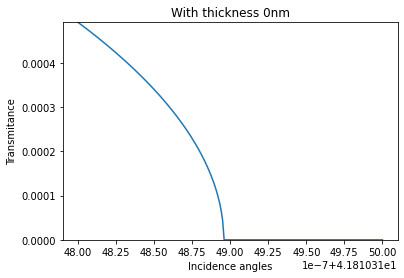

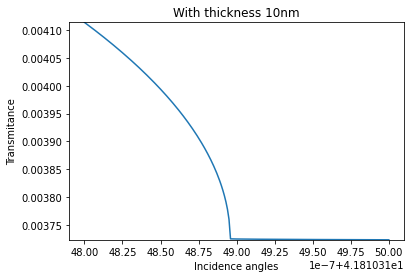

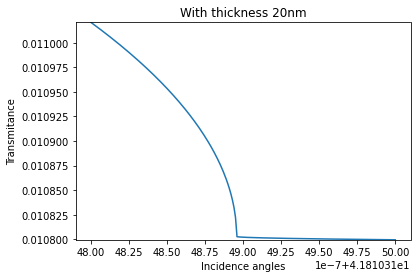

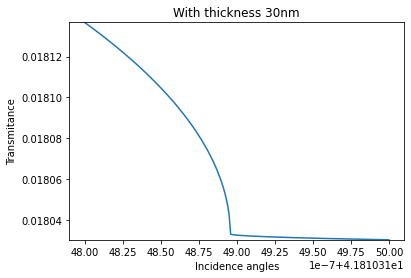

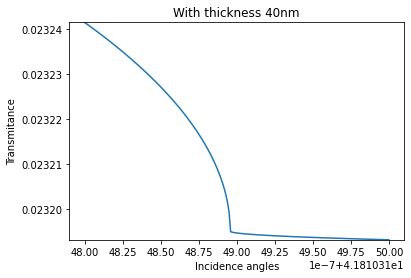

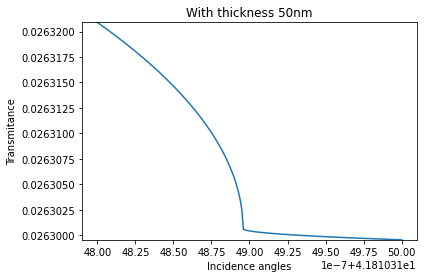

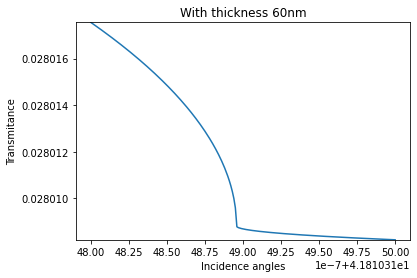

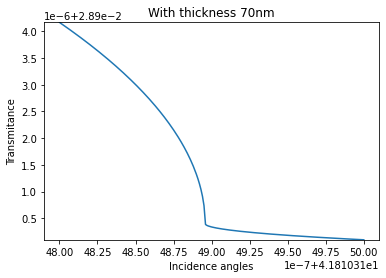

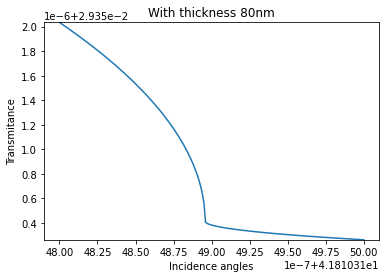

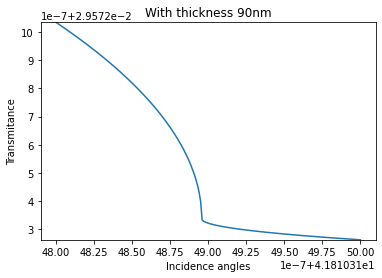

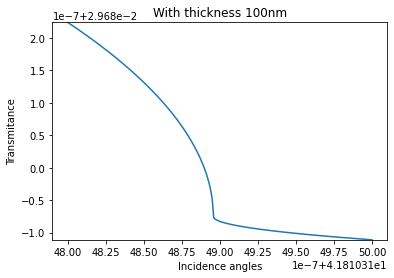

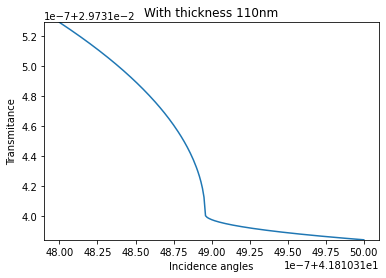

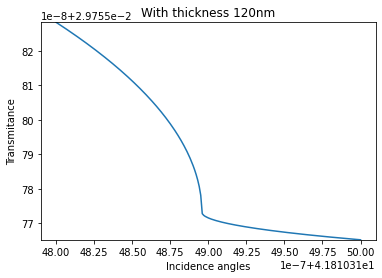

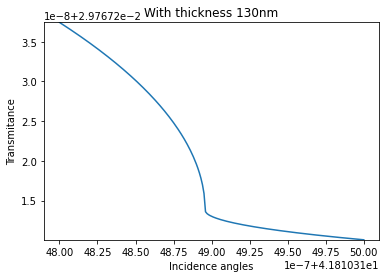

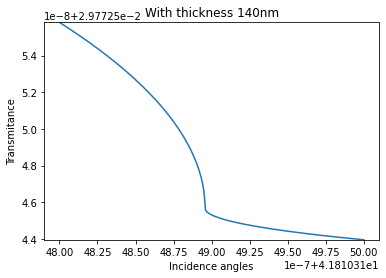

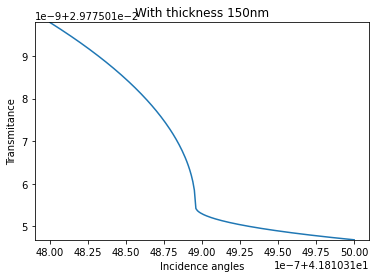

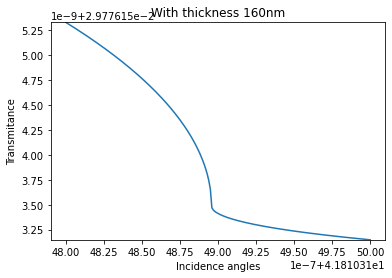

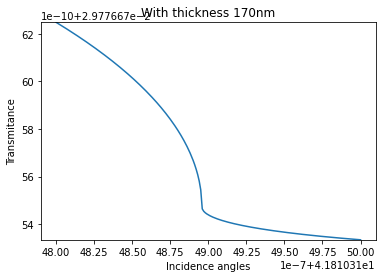

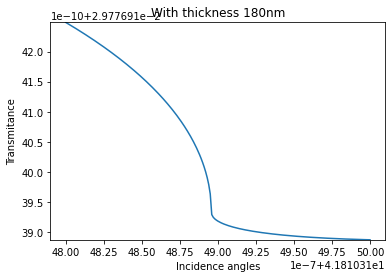

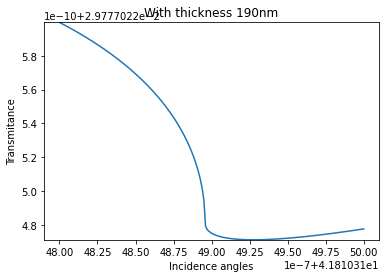

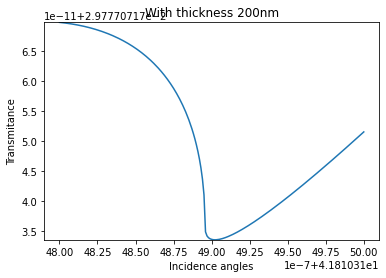

ValueError: ignored

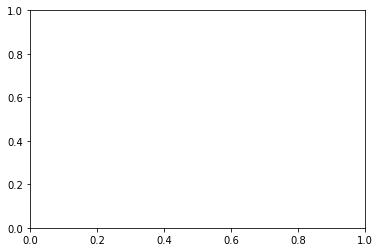

In [ ]:
incidence_angles = np.arange(41.8103148,41.810315,0.000000001)
thicknesses_for_reflectance = np.arange(0,210,10)

critical_angles = np.empty([0])

for thickness in thicknesses_for_reflectance:
  reflectance_ = np.empty([0])
  second_derivative_of_transmitance = np.empty([0])
  for angle in incidence_angles:
    reflectance_ = np.append(reflectance_, reflectance_from_fresnel_equation(input_refractive_indexes, thickness, angle*np.pi/180))
    transmitance_ = 1 - reflectance_
    second_derivative_of_transmitance = np.append(second_derivative_of_transmitance, derivative(function_to_derivate, angle, dx=1e-10,args=(thickness, ), n=2))

  critical_angles=np.append(critical_angles, incidence_angles[np.where(second_derivative_of_transmitance == np.max(second_derivative_of_transmitance))])

  # Plot of reflectance vs incidence angles
  plt.plot(incidence_angles, transmitance_)
  plt.ylim(np.min(transmitance_), np.max(transmitance_))
  plt.xlabel("Incidence angles")
  plt.ylabel("Transmitance")
  plt.title(f'With thickness {thickness}nm')
  plt.show()


# Plot critical angle for different thicknesses
plt.plot(thicknesses_for_reflectance, critical_angles)
plt.ylim(np.min(critical_angles), np.max(critical_angles))
plt.xlabel("Thicknesses")
plt.ylabel("Critical angles")
plt.title('Critical angles vs Thicknesses')
plt.show()

In [ ]:
critical_angles

array([41.81031483, 41.81031498, 41.81031498, 41.81031493, 41.8103149 ,
       41.81031493, 41.81031498, 41.81031499, 41.81031483, 41.81031481,
       41.81031486, 41.81031491, 41.81031497, 41.81031481, 41.81031489,
       41.81031493, 41.81031483, 41.81031492, 41.81031497, 41.81031489,
       41.81031481, 41.81031482, 41.81031488, 41.81031481, 41.81031494,
       41.81031495, 41.81031486, 41.81031487, 41.81031482, 41.81031493,
       41.81031494])